<a href="https://colab.research.google.com/github/ranja-sarkar/DecisionTree/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> Characteristics of **random forest** or **bagging ensemble** of trees (baseline, non-parametric model):
>
>> It's kind of robust, trains fast.

>> It's well suited for mixed datatypes.

>> As it's bootstrap aggregation ensemble, it decreases variance (does not overfit). There's in general overfitting with a single decision tree.

>> Model performance metric to some extent is a function of the number of estimators (trees) used while training.

>> It can handle nonlinear problems and has good out-of-the-box performance.

>> It performs implicit feature selection via the feature splitting criterion at each node; it is not immune to irrelevant features, and considers only a fixed number of randomly selected features at each node.

> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from numpy import mean
import missingno as msn

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedStratifiedKFold

# Data

In [19]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')
print(df_train.shape, df_test.shape)


#df_train = df_train.dropna(how = 'all', axis = 0) #drop empty rows if any
#df_train.dtypes

(10000, 16) (2000, 15)


<Axes: >

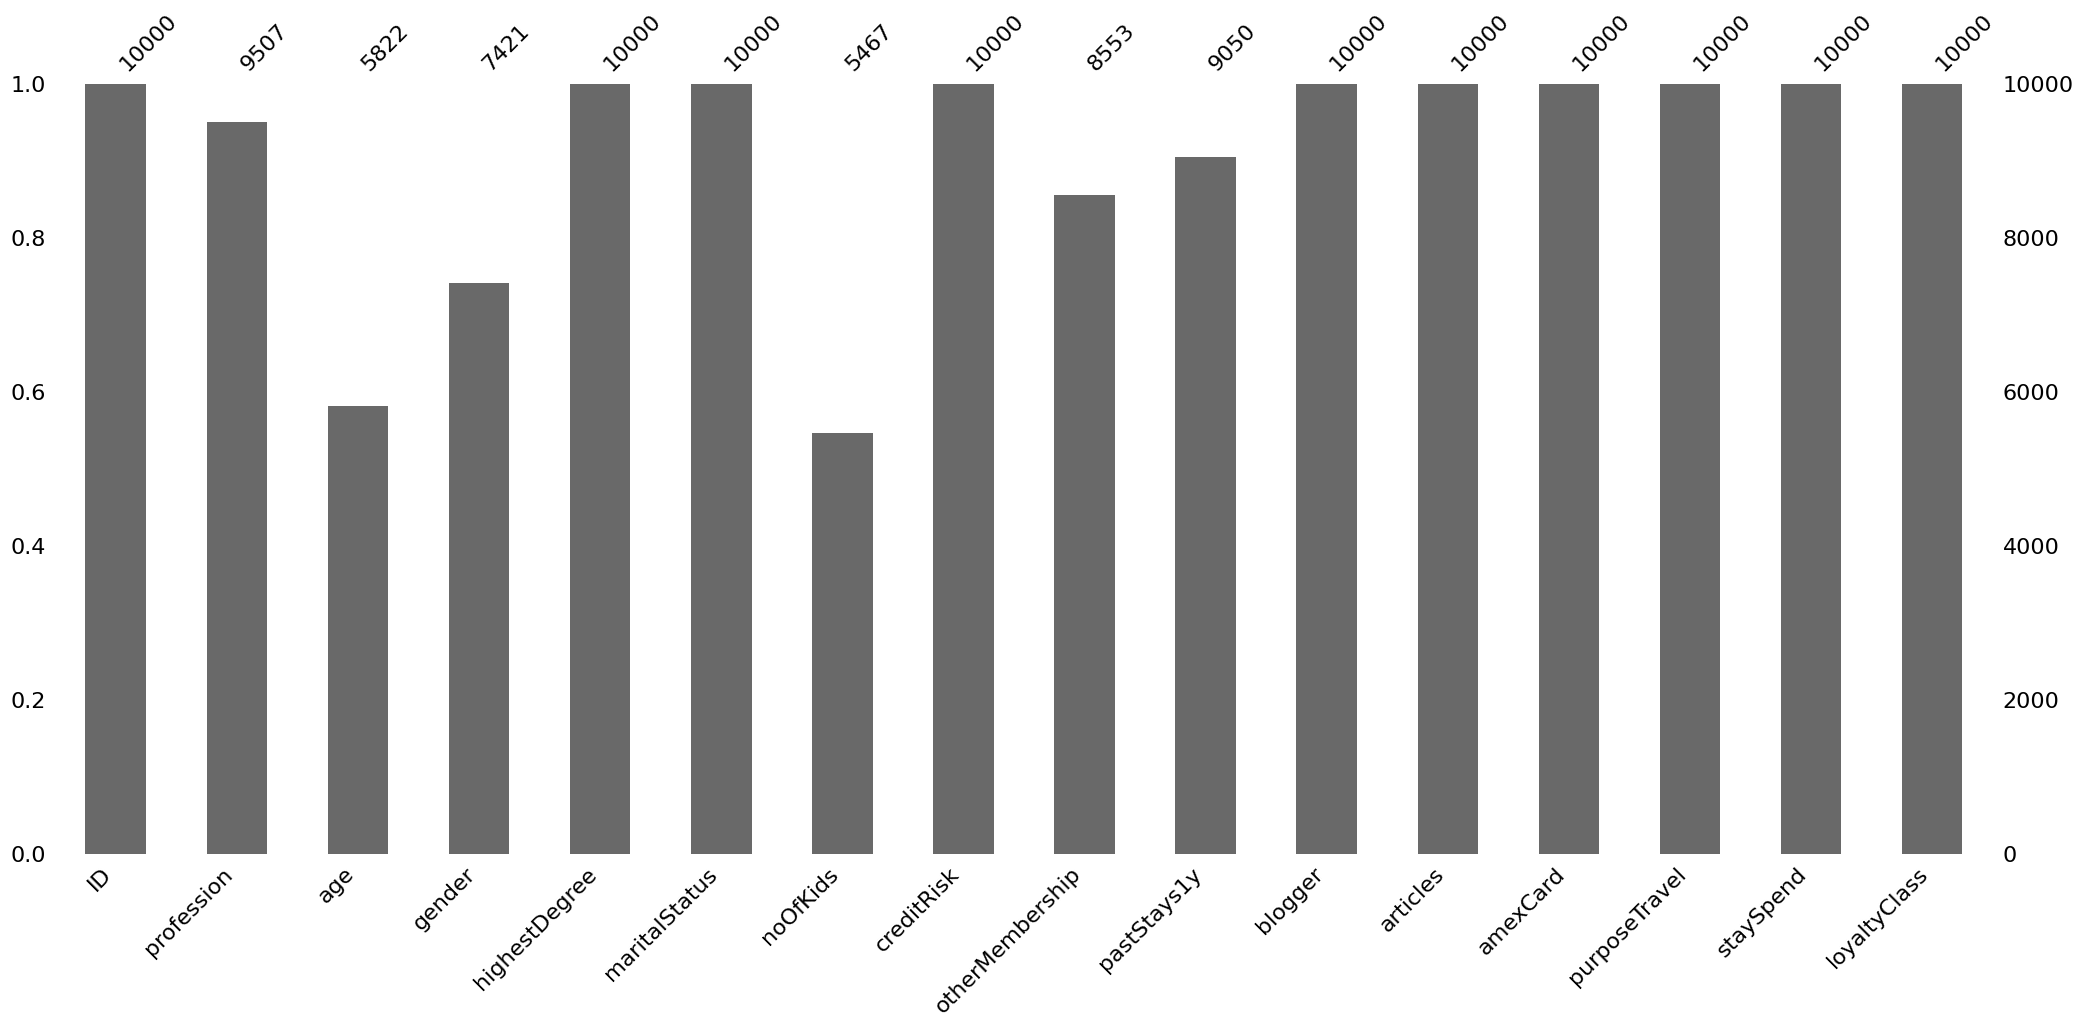

In [20]:
msn.bar(df_train)    #color = 'blue'

In [ ]:
#msn.matrix(df_train)
#msn.dendrogram(df_train)

#msn.heatmap(df_test)

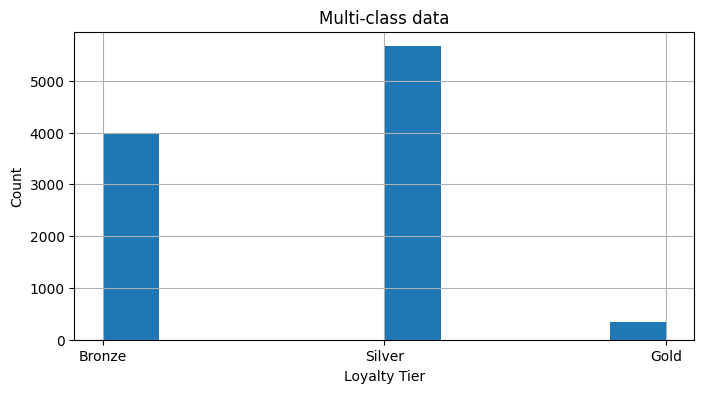

In [21]:
def variables_plot(df, col):

    """
    Function: Describes and plots data classes
    Arguments: Dataframe, target feature

    """

    #df_stats = df.drop('ID', axis = 1)
    #df.describe().T

    #df.hist(figsize = (9,7))
    df[col].hist(figsize = (8, 4))
    plt.xlabel('Loyalty Tier')
    plt.ylabel('Count')
    plt.title('Multi-class data')


    return plt.show()


variables_plot(df_train, 'loyaltyClass')

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10000 non-null  int64  
 1   profession       9507 non-null   object 
 2   age              5822 non-null   float64
 3   gender           7421 non-null   object 
 4   highestDegree    10000 non-null  object 
 5   maritalStatus    10000 non-null  object 
 6   noOfKids         5467 non-null   float64
 7   creditRisk       10000 non-null  float64
 8   otherMembership  8553 non-null   object 
 9   pastStays1y      9050 non-null   float64
 10  blogger          10000 non-null  object 
 11  articles         10000 non-null  int64  
 12  amexCard         10000 non-null  object 
 13  purposeTravel    10000 non-null  object 
 14  staySpend        10000 non-null  float64
 15  loyaltyClass     10000 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 1.2+ MB


> Label encoding categorical variables

In [23]:
le = LabelEncoder()

df_train['profession'] = le.fit_transform(df_train['profession']).astype('str')
df_test['profession'] = le.fit_transform(df_test['profession']).astype('str')

df_train['gender'] = le.fit_transform(df_train['gender']).astype('str')
df_test['gender'] = le.fit_transform(df_test['gender']).astype('str')

df_train['highestDegree'] = le.fit_transform(df_train['highestDegree']).astype('str')
df_test['highestDegree'] = le.fit_transform(df_test['highestDegree']).astype('str')

df_train['maritalStatus'] = le.fit_transform(df_train['maritalStatus']).astype('str')
df_test['maritalStatus'] = le.fit_transform(df_test['maritalStatus']).astype('str')

df_train['otherMembership'] = le.fit_transform(df_train['otherMembership']).astype('str')
df_test['otherMembership'] = le.fit_transform(df_test['otherMembership']).astype('str')

df_train['blogger'] = le.fit_transform(df_train['blogger']).astype('str')
df_test['blogger'] = le.fit_transform(df_test['blogger']).astype('str')

df_train['amexCard'] = le.fit_transform(df_train['amexCard']).astype('str')
df_test['amexCard'] = le.fit_transform(df_test['amexCard']).astype('str')

df_train['purposeTravel'] = le.fit_transform(df_train['purposeTravel']).astype('str')
df_test['purposeTravel'] = le.fit_transform(df_test['purposeTravel']).astype('str')

df_train['loyaltyClass'] = le.fit_transform(df_train['loyaltyClass']).astype('str')


> Filling in missing values

In [24]:

df_train['age'].fillna(df_train['age'].mean())
df_test['age'].fillna(df_test['age'].mean())

df_train['noOfKids'].fillna(0)
df_test['noOfKids'].fillna(0)

df_train['pastStays1y'].fillna(0)
df_test['pastStays1y'].fillna(0)

,pastStays1y
0,33.0
1,17.0
2,33.0
3,23.0
4,21.0
...,...
1995,0.0
1996,44.0
1997,0.0
1998,30.0


In [25]:
df_train.columns

Index(['ID', 'profession', 'age', 'gender', 'highestDegree', 'maritalStatus',
       'noOfKids', 'creditRisk', 'otherMembership', 'pastStays1y', 'blogger',
       'articles', 'amexCard', 'purposeTravel', 'staySpend', 'loyaltyClass'],
      dtype='object')

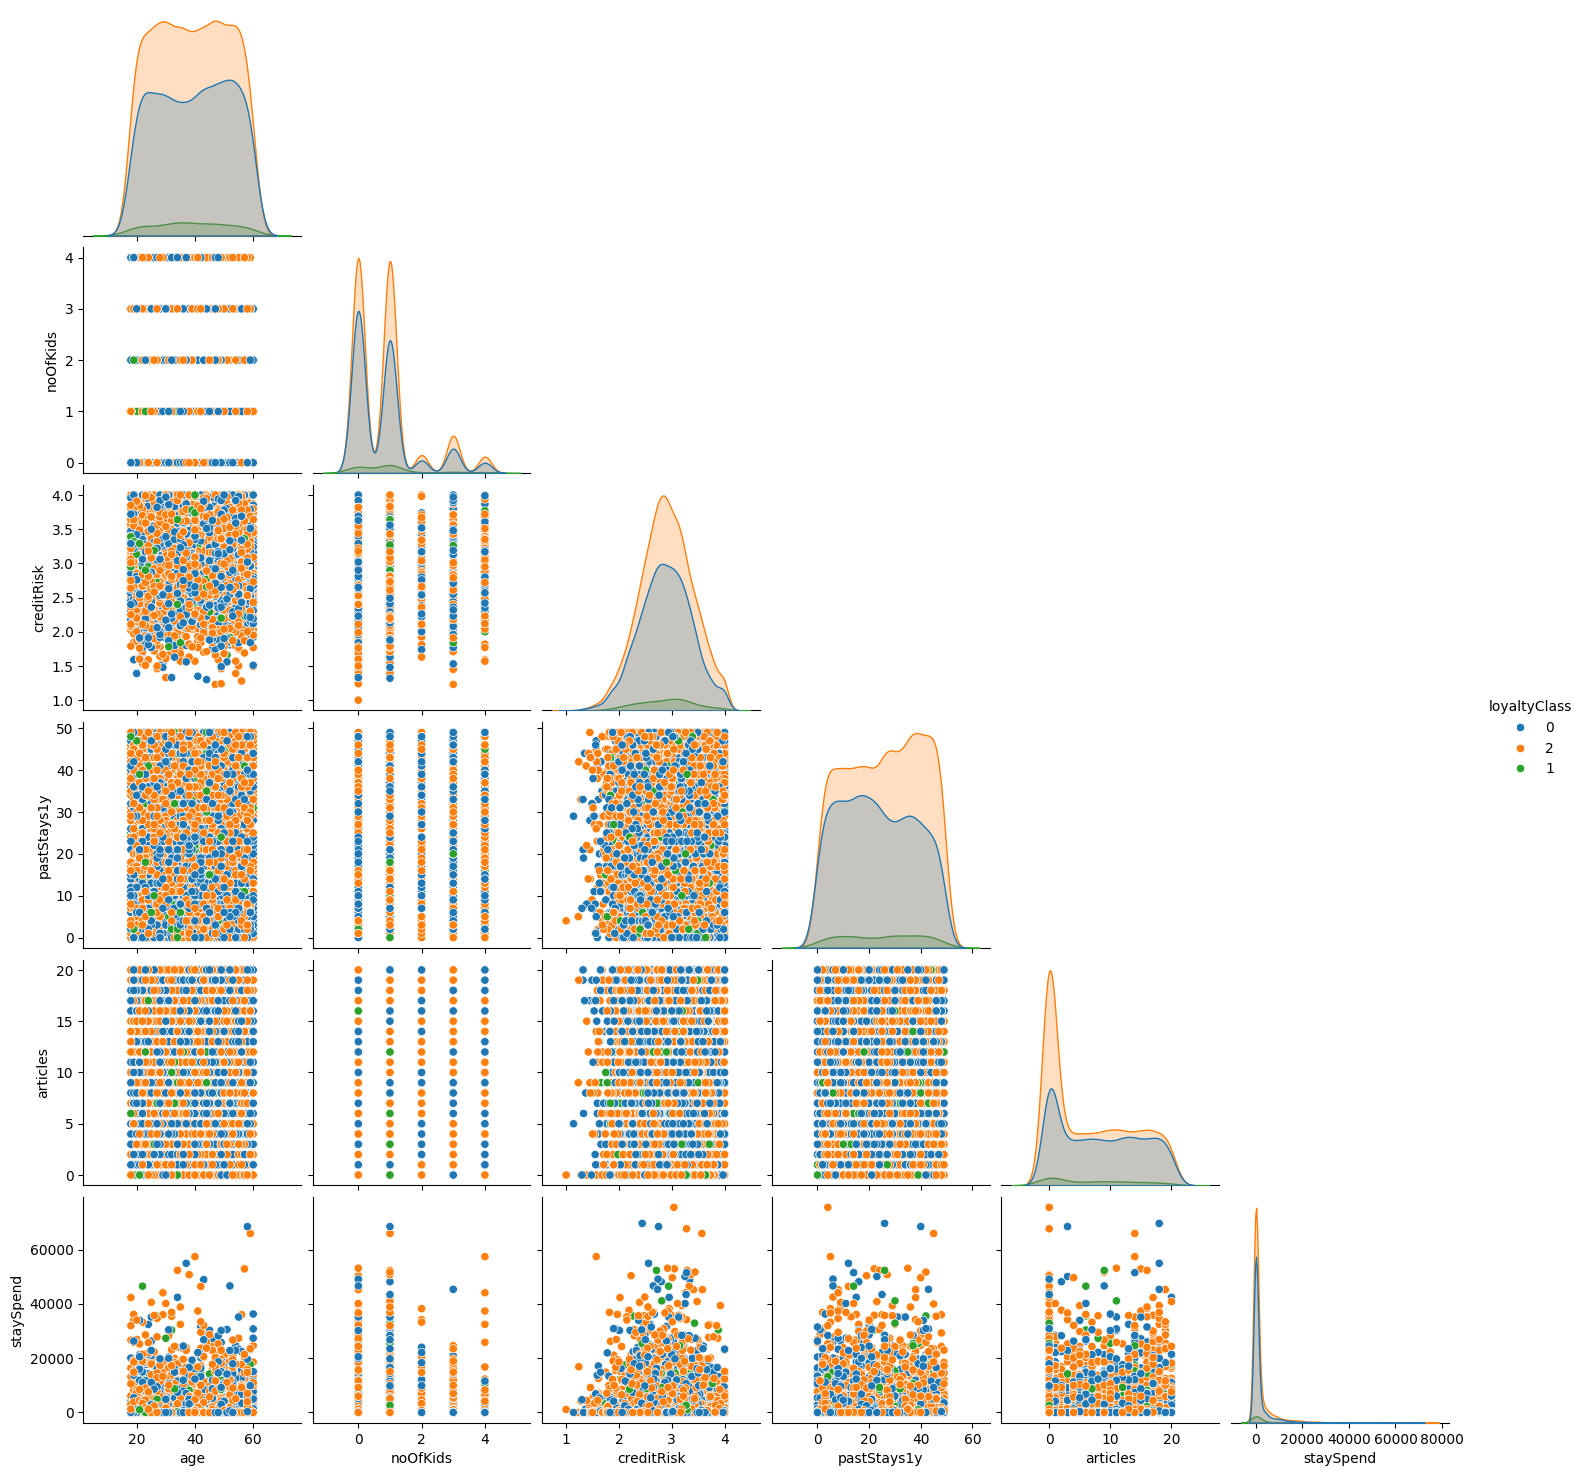

In [27]:
sns.pairplot(df_train.drop('ID', axis = 1), hue = 'loyaltyClass', corner = True)

<Axes: >

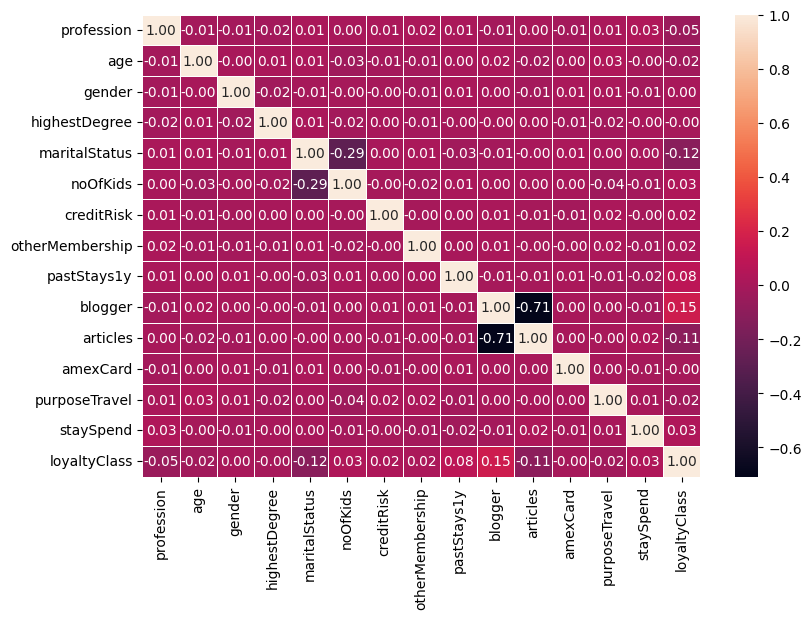

In [28]:
plt.figure(figsize = (9, 6))
sns.heatmap(df_train.drop('ID', axis = 1).corr(), annot = True, fmt = '.2f', linewidths = 0.5)

In [29]:
df_train.head(5)

,ID,profession,age,gender,highestDegree,maritalStatus,noOfKids,creditRisk,otherMembership,pastStays1y,blogger,articles,amexCard,purposeTravel,staySpend,loyaltyClass
0,0,2,NaN,1,3,2,0.0,3.18,3,23.0,0,7,1,2,1433.147527,0
1,1,1,NaN,2,0,1,1.0,2.07,3,48.0,0,4,1,1,38.379023,2
2,2,0,44.0,0,5,1,NaN,2.81,0,32.0,0,1,0,1,0.000000,0
3,3,2,NaN,1,1,2,0.0,3.46,3,6.0,0,16,1,2,0.000000,0
4,4,0,NaN,0,1,3,NaN,3.21,5,NaN,1,0,0,0,764.418767,2


> Minmax Scaling of train data

In [30]:
dff_train = df_train.drop('ID', axis = 1)
df_column_names = list(dff_train.columns)
df_column_names.remove('loyaltyClass')

x = dff_train.loc[:, dff_train.columns != 'loyaltyClass'].values  #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(data = x_scaled, columns = df_column_names)
df_normalized.head(5)

,profession,age,gender,highestDegree,maritalStatus,noOfKids,creditRisk,otherMembership,pastStays1y,blogger,articles,amexCard,purposeTravel,staySpend
0,0.50,NaN,0.5,0.428571,0.666667,0.00,0.726667,0.500000,0.469388,0.0,0.35,1.0,1.0,0.018969
1,0.25,NaN,1.0,0.000000,0.333333,0.25,0.356667,0.500000,0.979592,0.0,0.20,1.0,0.5,0.000508
2,0.00,0.619048,0.0,0.714286,0.333333,NaN,0.603333,0.000000,0.653061,0.0,0.05,0.0,0.5,0.000000
3,0.50,NaN,0.5,0.142857,0.666667,0.00,0.820000,0.500000,0.122449,0.0,0.80,1.0,1.0,0.000000
4,0.00,NaN,0.0,0.142857,1.000000,NaN,0.736667,0.833333,NaN,1.0,0.00,0.0,0.0,0.010118


> Minmax scaling of test data

In [31]:
dff_test = df_test.drop('ID', axis = 1)
dff_column_names = list(dff_test.columns)

xt = dff_test.loc[:,].values                    #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xt)
dff_normalized = pd.DataFrame(data = x_scaled, columns = dff_column_names)
dff_normalized.head()

,profession,age,gender,highestDegree,maritalStatus,noOfKids,creditRisk,otherMembership,pastStays1y,blogger,articles,amexCard,purposeTravel,staySpend
0,0.00,NaN,0.0,0.428571,1.000000,0.50,0.656250,0.833333,0.673469,1.0,0.00,1.0,1.0,0.010070
1,0.50,0.095238,0.0,0.428571,0.000000,0.25,0.840278,0.833333,0.346939,0.0,0.20,0.0,0.5,0.115630
2,0.50,NaN,0.5,0.000000,0.333333,0.00,0.486111,1.000000,0.673469,1.0,0.00,1.0,0.5,0.000631
3,0.50,0.214286,0.5,0.000000,0.000000,NaN,0.715278,0.500000,0.469388,0.0,0.60,0.0,0.0,0.000000
4,0.25,NaN,1.0,1.000000,0.333333,0.25,0.638889,0.500000,0.428571,0.0,0.05,0.0,0.5,0.000571


> Setting up predictor variables and the target

In [32]:
df_normalized_target = pd.concat([df_normalized, dff_train['loyaltyClass']], axis = 1)

X = df_normalized_target[list(df_normalized_target.columns)[0:14]]
print(X.shape)

Y = df_normalized_target[list(df_normalized_target.columns)[-1]]
print(Y.shape)

(10000, 14)
(10000,)


# Resampling: Over-sampling

> Generate new samples in the classes which are under-represented by random oversampling.

>> https://imbalanced-learn.org/stable/over_sampling.html#naive-random-over-sampling


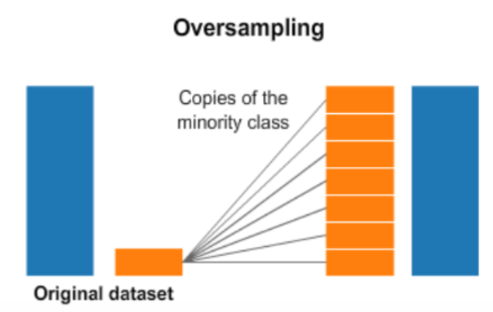

In [33]:
#strategy = {0:6000, 1:6000, 2:6000}
#x, y = make_imbalance(X, Y, sampling_strategy = strategy, random_state = 42)


oversample = RandomOverSampler(sampling_strategy = 'minority')
x, y = oversample.fit_resample(X, Y)
print(Counter(y))

Counter({'2': 5665, '1': 5665, '0': 3998})


> **SMOTE** is another method - Synthetic Minority Oversampling Technique by which new samples are generated by interpolation. SMOTE uses the kNN algorithm to synthesize samples.

>> https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn


> We continue with **Random Oversampling** here in this case study.

>> Data splitting

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

# Model training (criterion Gini index)

In [37]:
rfc1 = RandomForestClassifier(n_estimators = 100, random_state = 42)            #class_weight = 'balanced'
rfc1.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#rfc1.get_params()

In [38]:
rfc_pred1 = rfc1.predict(x_test)

print ("Accuracy=", round(metrics.accuracy_score(y_test, rfc_pred1), 2))
print('Confusion Matrix (True label vs. Predicted label):')
print(confusion_matrix(y_test, rfc_pred1))
print('Classification Report:')
print(classification_report(y_test, rfc_pred1))

Accuracy= 0.76
Confusion Matrix (True label vs. Predicted label):
[[ 396    0  601]
 [   0 1378    0]
 [ 305    0 1152]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.40      0.47       997
           1       1.00      1.00      1.00      1378
           2       0.66      0.79      0.72      1457

    accuracy                           0.76      3832
   macro avg       0.74      0.73      0.73      3832
weighted avg       0.76      0.76      0.75      3832



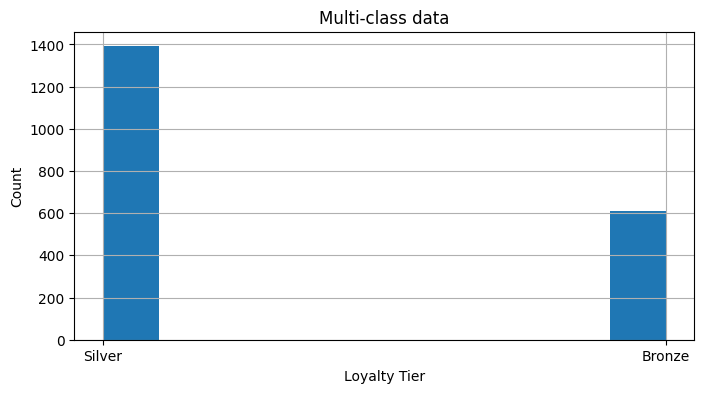

In [39]:
XT = dff_normalized[list(dff_normalized.columns)[0:15]]

pred1 = rfc1.predict(XT)

results1 = pd.DataFrame(pred1, columns = ['Predicted loyaltyClass'])
dfc1 = pd.concat([df_test, results1], axis = 1)
#dfc1.shape

dfc1.loc[(dfc1['Predicted loyaltyClass'] == '0'), 'loyaltyTier'] = 'Bronze'
dfc1.loc[(dfc1['Predicted loyaltyClass'] == '1'), 'loyaltyTier'] = 'Gold'
dfc1.loc[(dfc1['Predicted loyaltyClass'] == '2'), 'loyaltyTier'] = 'Silver'

variables_plot(dfc1, 'loyaltyTier')

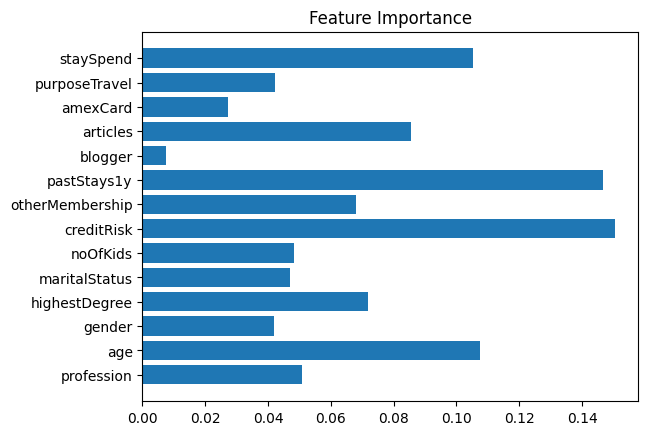

In [40]:
plt.barh(dff_normalized.columns, rfc1.feature_importances_)
plt.title ('Feature Importance')
plt.show()

>>


In [41]:
##https://github.com/shap/shap

#import shap

#def features(model_obj, x):
#    """
#    Function: Displays SHAP values of features
#    Arguments: Trained model, feature test dataframe

#    """

#    explainer = shap.TreeExplainer(model_obj)
#    shap_vals = explainer.shap_values(x)

#    #return shap.plots.beeswarm(shap_vals)
#    return shap.summary_plot(shap_vals, x, plot_size = (5, 5))
#    #return shap.plots.bar(shap_vals)

#features(rfc1, XT)

# Model training (criterion Entropy)

In [42]:
rfc2 = RandomForestClassifier(criterion = "entropy", n_estimators = 100, random_state = 42)
rfc2.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [43]:
rfc_pred2 = rfc2.predict(x_test)

print ("Accuracy=", round(metrics.accuracy_score(y_test, rfc_pred2), 2))
print('Confusion Matrix (True label vs. Predicted label):')
print(confusion_matrix(y_test, rfc_pred2))
print('Classification Report:')
print(classification_report(y_test, rfc_pred2))

Accuracy= 0.76
Confusion Matrix (True label vs. Predicted label):
[[ 403    1  593]
 [   0 1378    0]
 [ 330    1 1126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.40      0.47       997
           1       1.00      1.00      1.00      1378
           2       0.66      0.77      0.71      1457

    accuracy                           0.76      3832
   macro avg       0.73      0.73      0.72      3832
weighted avg       0.75      0.76      0.75      3832



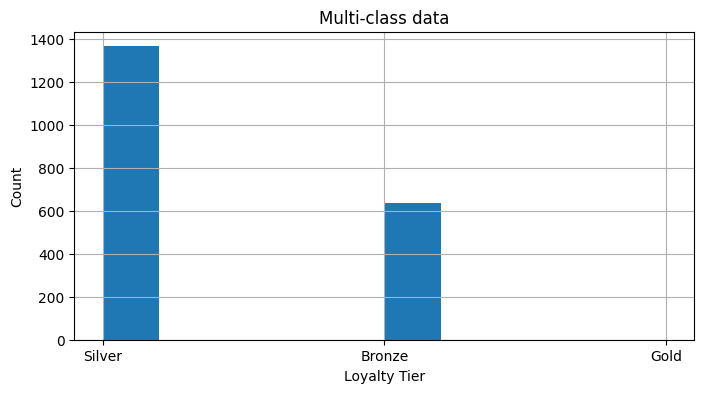

In [44]:
pred2 = rfc2.predict(XT)

results2 = pd.DataFrame(pred2, columns = ['Predicted loyaltyClass'])
dfc2 = pd.concat([df_test, results2], axis = 1)

dfc2.loc[(dfc2['Predicted loyaltyClass'] == '0'), 'loyaltyTier'] = 'Bronze'
dfc2.loc[(dfc2['Predicted loyaltyClass'] == '1'), 'loyaltyTier'] = 'Gold'
dfc2.loc[(dfc2['Predicted loyaltyClass'] == '2'), 'loyaltyTier'] = 'Silver'

variables_plot(dfc2, 'loyaltyTier')

> Results do not make much difference with different criteria.

# Resampling: Under-sampling

> Balance the data by randomly selecting a subset of data for the targeted classes

>> https://imbalanced-learn.org/stable/under_sampling.html#random-under-sampling


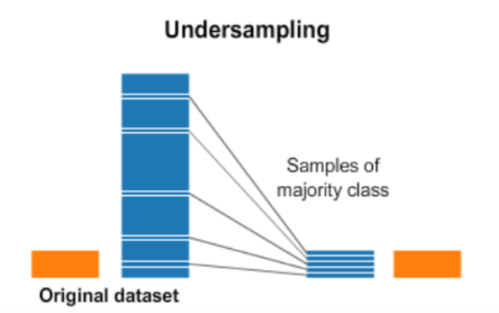

In [45]:
undersample = RandomUnderSampler(sampling_strategy = 'majority')
x, y = undersample.fit_resample(X, Y)
print(Counter(y))

Counter({'0': 3998, '1': 337, '2': 337})


>> Data splitting

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

# Model training (criterion Entropy)

In [47]:
rfc3 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rfc3.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [48]:
rfc_pred3 = rfc3.predict(x_test)

print ("Accuracy=", round(metrics.accuracy_score(y_test, rfc_pred3), 2))
print('Confusion Matrix (True label vs. Predicted label):')
print(confusion_matrix(y_test, rfc_pred3))
print('Classification Report:')
print(classification_report(y_test, rfc_pred3))

Accuracy= 0.85
Confusion Matrix (True label vs. Predicted label):
[[987   0   1]
 [ 89   0   0]
 [ 91   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       988
           1       0.00      0.00      0.00        89
           2       0.00      0.00      0.00        91

    accuracy                           0.85      1168
   macro avg       0.28      0.33      0.31      1168
weighted avg       0.72      0.85      0.77      1168



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


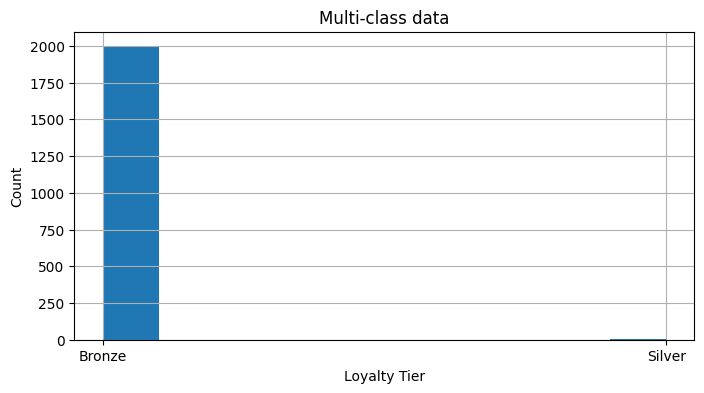

In [49]:
XT = dff_normalized[list(dff_normalized.columns)[0:15]]

pred3 = rfc3.predict(XT)

results = pd.DataFrame(pred3, columns = ['Predicted loyaltyClass'])
dfc3 = pd.concat([df_test, results], axis = 1)

dfc3.loc[(dfc3['Predicted loyaltyClass'] == '0'), 'loyaltyTier'] = 'Bronze'
dfc3.loc[(dfc3['Predicted loyaltyClass'] == '1'), 'loyaltyTier'] = 'Gold'
dfc3.loc[(dfc3['Predicted loyaltyClass'] == '2'), 'loyaltyTier'] = 'Silver'

variables_plot(dfc3, 'loyaltyTier')

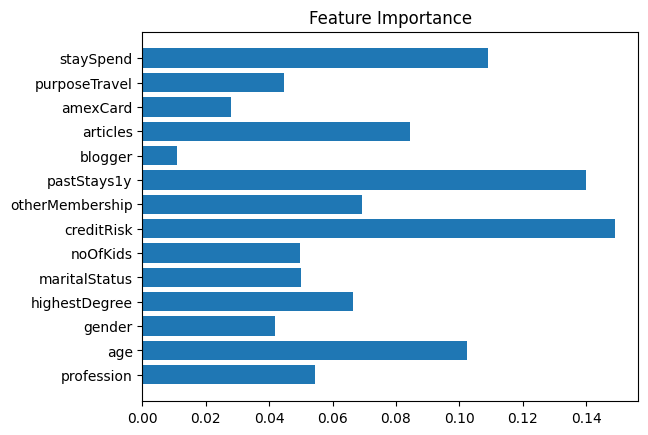

In [50]:
plt.barh(dff_normalized.columns, rfc3.feature_importances_)
plt.title ('Feature Importance')
plt.show()

In [51]:
#features(rfc3, XT)

# Model training (criterion Gini index)

In [53]:
rfc4 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
rfc4.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
rfc_pred4 = rfc4.predict(x_test)

print ("Accuracy=", round(metrics.accuracy_score(y_test, rfc_pred4), 2))
print('Confusion Matrix (True label vs. Predicted label):')
print(confusion_matrix(y_test, rfc_pred4))
print('Classification Report:')
print(classification_report(y_test, rfc_pred4))

Accuracy= 0.85
Confusion Matrix (True label vs. Predicted label):
[[987   0   1]
 [ 89   0   0]
 [ 91   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       988
           1       0.00      0.00      0.00        89
           2       0.00      0.00      0.00        91

    accuracy                           0.85      1168
   macro avg       0.28      0.33      0.31      1168
weighted avg       0.72      0.85      0.77      1168



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


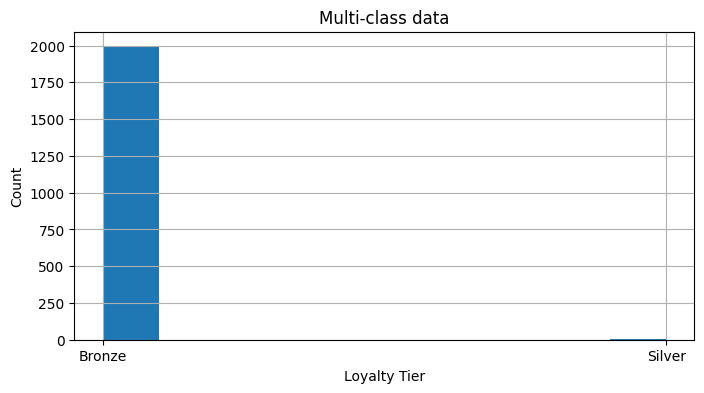

In [55]:
pred4 = rfc4.predict(XT)
results = pd.DataFrame(pred4, columns = ['Predicted loyaltyClass'])
dfc4 = pd.concat([df_test, results], axis = 1)

dfc4.loc[(dfc4['Predicted loyaltyClass'] == '0'), 'loyaltyTier'] = 'Bronze'
dfc4.loc[(dfc4['Predicted loyaltyClass'] == '1'), 'loyaltyTier'] = 'Gold'
dfc4.loc[(dfc4['Predicted loyaltyClass'] == '2'), 'loyaltyTier'] = 'Silver'

variables_plot(dfc4, 'loyaltyTier')

> The accuracy is 85% for model trained with undersampled data, as opposed to 76% for model trained with oversampled data.

>> RF model predictions for customer classes with oversampled data however follow a similar distribution as the training data, which is not followed with undersampled data.

# Discussion

> Gini index tends to be less sensitive to class imbalance, as it works to minimize the misclassification error.

> The model predictions change when the probability threshold or decision threshold changes. By default, the threshold is set to 0.5 in scikit-klearn assuming balance in the dataset (in its target class).

Here's how to tune the threshold: https://scikit-learn.org/1.5/modules/classification_threshold.html

>> It is shown by researchers that optimizing the decision threshold is as effective as random oversampling.

